### Linear Regression

Linear regression is a linear approach to modeling the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to find the coefficients that minimize the sum of squared differences between the observed and predicted values.

In [ ]:
import numpy as np
class LinearRegression:

    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            # Predict
            y_pred = np.dot(X, self.weights) + self.bias

            # Gradient Computations
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.bias * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Optimal Coefficients (from Normal Equation): [4.21509616 2.77011339]


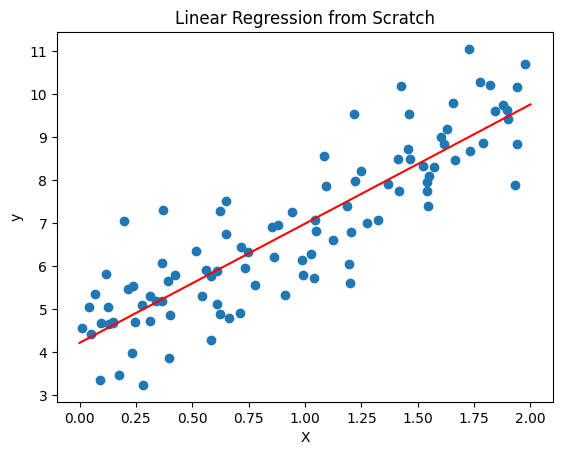

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Compute the optimal coefficients using the normal equation
theta_optimal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the optimal coefficients
print("Optimal Coefficients (from Normal Equation):", theta_optimal.ravel())

# Make predictions on new data
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_optimal)

# Plot the data and regression line
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression from Scratch")
plt.show()

#### With Scikit-learn


Intercept: [4.21509616]
Slope (Coefficient): [[2.77011339]]


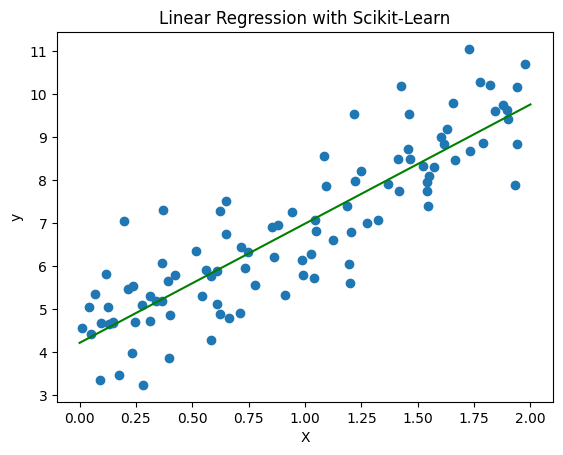

In [2]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the data
lin_reg.fit(X, y)

# Print the intercept and slope (coefficients)
print("Intercept:", lin_reg.intercept_)
print("Slope (Coefficient):", lin_reg.coef_)

# Make predictions using the model
y_predict_sklearn = lin_reg.predict(X_new)

# Plot the data and regression line
plt.scatter(X, y)
plt.plot(X_new, y_predict_sklearn, "g-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Scikit-Learn")
plt.show()